#Тестовое на продуктового аналитика

##Часть 1

1. **Дайте определение ARPPU. В результате изменений в продукте ARPPU снизился. Это хорошо или плохо? Отвечайте развернуто.**

ARPPU (англ. Average revenue per paying user) — это метрика, которая показывает среднюю прибыль от одного платящего пользователя за определенный период времени. При расчете ARPPU в числителе остается выручка (Revenue), а в знаменателе число платящих пользователей.

*ARPPU = ARPU / Paying Share = Revenue / (Users * Paying Share)*

Чтобы ответтьна вопрос, снижение ARPPU - это плохо или хорошо, нужно посмотреть взаимосвязь этой метрики с другими метриками продукта.

1. **ARPPU - LTV** </br>

Пример 1. Довольно частая практика стимулиирования долгосрочных подписок - предложение скдок на более длинные периоды. В то время как ARPPU снижается, увеличивается удержание пользователей , в последствии, LTV. Т.е. в этом случае снижение ARPPU положительно скажется на бизнесе. </br>

Пример 2. Сервис поднял цены, и ARPPU поднялось вслед за ними. Однако это не значит, что они будут больше зарабатывать, так как доля платящих пользователей может резко упасть. Здесь повышение ARPPU может негативно отразиться на делах продукта.

2. **ARPPU - Conversion rates** </br>

Пример. Мы нашли новый канал привлечения пользователей. Увеличивается число платящих пользователей, при этом они являются так называемыми "low-reveneu". ARPPU снизится, но в перспективе эти пользователеи могут совершать дальнейшие платежи, в результате чего они принесут доход бизнесу.

2. **Предположим, что в результате обновления дизайна продукта вы наблюдаете увеличение среднего времени нахождения пользователей в приложении, но уровень конверсии в покупку снизился. Как вы будете анализировать данное изменение и какие рекомендации вы предложите команде продукта?**

В играх есть возможность играть бесплатно без каких-либо привилегий и покупать дополнительные атрибуты, позволяющие двигаться внутри игры более эффективно, так называемые freemium и premium сценарии соответственно. </br>

Допустим, после обновления дизайна к нам пришли новые пользователи. Им все нравится, они активно играют в приложении. Среднее время нахождения пользователей в приложении выросло. Однако конверсия в покупку снизилась. Предположим, что это связано с тем, что новые пользователи не видят необходимости покупать платные атрибуты для прохождения уровней, и покупки совершают лишь постоянные пользователи, которые уже давно в игре. </br>

Делаем вывод, что баланс между freemium и premium сценариями сместился в сторону бесплатного, и нужно "заставить" новых пользователей начать делать покупки в игре. Этого можно добиться добавив в магазин, например, какие-то недорогие атрбуты, которые будут обладать достаточным профитом для пользователя. Осознав, что с платными штуками игра идет интереснее и эффективнее, пользователи продолжат платить, что нам и нужно.

##Часть 2

В базе представлены данные об активности пользователей в обучающем игровом приложении. Рассчитайте следующие метрики:
* Retention и время, которое ученики проводят в приложении.
* Как ученики переходят с уровня на уровень.
* Метрики монетизации для всей когорты
* Где ученики совершают больше всего платежей?
* Где ученики совершают первые платежи?

Какие выводы вы можете сделать из расчетов:
* Выберете 3-4 метрики, которые следует отслеживать в первую очередь?
* Какие еще метрики следует отслеживать?
* Какие данные стоит собирать дополнительно к уже собираемым, чтобы рассчитать предлагаемые тобою метрики?

# Оглавление

1. [Цель исследования](#goal)
2. [Описание данных](#description)
3. [Ход исследования](#project)
    * [Загрузка данных](#start)
    * [Изучение общей информации и предобработка данных](#preprocessing)
    * [Анализ данных](#analysis)
      * [Расчет Retention и времени, которое ученики проводят в приложении](#retention)
      * [Изучение пути пользователя в игре](#usermap)
      * [Расчет метрик монетизации для всей когорты](#money)
      * [Изучение того, где ученики совершают больше всего платежей](#payments)
      * [Изучение того, где ученики совершают первые платежи](#firstpayments)
    * [Выводы](#conclusion)

# <a id='goal'> Цель исследования </a>

Рассчитать метрики продукта (Retention и время, которое ученики проводят в приложении) и ответить на следующие вопросы:
* Как ученики переходят с уровня на уровень?
* Метрики монетизации для всей когорты?
* Где ученики совершают больше всего платежей?
* Где ученики совершают первые платежи?

Сделать выводы можно сделать из расчетов и выбрать 3-4 метрики, которые следует отслеживать в первую очередь.
* Какие еще метрики следует отслеживать?
* Какие данные стоит собирать дополнительно к уже собираемым, чтобы рассчитать предлагаемые метрики?

# <a id='description'> Описание данных </a>

Таблица |Атрибут |Тип данных |Пояснение
----------|--------|-----------|----------
users     |user_id |string |id пользователя
users |reg_time |timestamp |время события
sessions |user_id |string |id пользователя
sessions |open_time |timestamp |время начала сессии
sessions |close_time |timestamp |время окончания сессии
payments |user_id |string |id пользователя
payments |time |timestamp |время события
payments |amt |numeric |сумма платежа
levels |user_id |string |id пользователя
levels |time |timestamp |время события
levels |level |numeric |номер полученного игроком уровня


# <a id='project'> Ход исследования </a>

## <a id='start'> Загрузка данных </a>

In [31]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
from datetime import datetime as dt
from datetime import timedelta
import plotly.express as px
from plotly import graph_objects as go
import io
import cufflinks as cf

In [32]:
# загрузим рабочие файлы

levels_path = "https://drive.google.com/file/d/1PTvPhh60kYncdT8jIyKtOke2qsEWk-2q/view?usp=sharing"
payments_path = "https://drive.google.com/file/d/1BAXOgGtj6x2Qn5-rkGvEDUPSNMDQqXYo/view?usp=sharing"
sessions_path = "https://drive.google.com/file/d/1iCCYcxz3xLnEQpcvpadrFqAt4bWNrv-P/view?usp=sharing"
users_path = "https://drive.google.com/file/d/1d5iTPnrySHODcmQSBZuwH3lVV0ua32H6/view?usp=sharing"

In [33]:
levels_url = 'https://drive.google.com/uc?id=' + levels_path.split('/')[-2]
payments_url = 'https://drive.google.com/uc?id=' + payments_path.split('/')[-2]
sessions_url = 'https://drive.google.com/uc?id=' + sessions_path.split('/')[-2]
users_url= 'https://drive.google.com/uc?id=' + users_path.split('/')[-2]


In [34]:
levels_raw = pd.read_csv(levels_url,usecols=range(1,4))
sessions_raw = pd.read_csv(sessions_url,usecols=range(1,4))
payments_raw = pd.read_csv(payments_url,usecols=range(1,4))
users_raw = pd.read_csv(users_url,usecols=range(1,3))

In [35]:
# загрузим рабочие файлы (локально)

#from google.colab import files
#uploaded = files.upload()

In [36]:
# откроем рабочие файлы (локально)

#levels_raw = pd.read_csv(io.BytesIO(uploaded['levels.csv']))
#sessions_raw = pd.read_csv(io.BytesIO(uploaded['sessions.csv']))
#payments_raw = pd.read_csv(io.BytesIO(uploaded['payments.csv']))
#users_raw = pd.read_csv(io.BytesIO(uploaded['users.csv']))

In [37]:
# откроем рабочие файлы

#levels_raw = pd.read_csv(
   #'https://file.notion.so/f/s/14b83d4b-6b29-4d57-ade2-2eb4e5331faf/levels.csv?id=be0ffb2d-297a-4c73-8792-049ed47175a9&table=block&spaceId=daa3be6d-804a-415d-9112-8c01fba24d73&expirationTimestamp=1686251503846&signature=H6WEOLHUMTBP6sh49o-5nRllXEtm0Gs7rnMJ5D3c7Xw',
   #usecols=range(1,4))
#sessions_raw = pd.read_csv(
   #'https://file.notion.so/f/s/3cb61cb0-60cf-43da-81c6-af7810a0296d/sessions.csv?id=c18ad30d-7199-4a1a-a0b2-af98a7d33839&table=block&spaceId=daa3be6d-804a-415d-9112-8c01fba24d73&expirationTimestamp=1686251497845&signature=_PeOh-QhSmMbkiMloTOpVKkV5RrLT1126b68_Ew4LAo',
   #usecols=range(1,4))
#payments_raw = pd.read_csv(
    #'https://file.notion.so/f/s/303bc69c-e5a2-4b18-a2cb-60704b14a909/payments.csv?id=8b3a1929-2e06-45ae-aec8-d5f6b22740dc&table=block&spaceId=daa3be6d-804a-415d-9112-8c01fba24d73&expirationTimestamp=1686251507994&signature=YsmSPXKtelIqilerDlPoX5O3h9zRvjgQ9S2bQkVQQ4U',
    #usecols=range(1,4))
#users_raw = pd.read_csv(
    #'https://file.notion.so/f/s/fc2913d8-c317-4ee5-a8de-21f6fb8832bc/users.csv?id=d62263e1-dc67-4b75-964c-b83f4894306c&table=block&spaceId=daa3be6d-804a-415d-9112-8c01fba24d73&expirationTimestamp=1686251511821&signature=zZ3T4lAeR0hfsJAHoQIb1L-AbcuAI0CvxEtksO0KpPg',
    #usecols=range(1,3))

## <a id='preprocessing'> Изучение общей информации и предобработка данных </a>

In [38]:
# сделаем копии датасетов

levels = levels_raw.copy(deep=True)
#levels.drop('Unnamed: 0', axis=1, inplace=True)
payments = payments_raw.copy(deep=True)
#payments.drop('Unnamed: 0', axis=1, inplace=True)
sessions = sessions_raw.copy(deep=True)
#sessions.drop('Unnamed: 0', axis=1, inplace=True)
users = users_raw.copy(deep=True)
#users.drop('Unnamed: 0', axis=1, inplace=True)

In [39]:
# создадим функцию для вывода предобработки данных

def info(data):
    # посмотрим общую информацию о файле
    print('Общая информация о датафрейме:')
    data.info()

    # выведем на экран 5 строчек таблицы

    pd.options.display.max_colwidth = 100
    pd.set_option('display.max_columns', 20)
    display(data.head(5))

    # посчитаем количество пропущенных значений

    print('Количество пропущенных значений:')
    print(data.isna().sum().sort_values(ascending=False))

    # посчитаем количество полных дубликатов

    print()
    print('Количество полных дубликатов: ', data.duplicated().sum())


In [40]:
# переведем столбцы с датами в удобный формат

levels['time'] = pd.to_datetime(levels['time']).round('2s')
payments['pay_time'] = pd.to_datetime(payments['pay_time']).round('2s')
sessions['close_time'] = pd.to_datetime(sessions['close_time']).round('2s')
sessions['open_time'] = pd.to_datetime(sessions['open_time']).round('2s')
users['reg_time'] = pd.to_datetime(users['reg_time']).round('2s')

In [41]:
datasets = [("levels",levels), ("payments",payments), ("sessions",sessions), ("users",users)]

In [42]:
for i in datasets:
  print(i[0])
  print()
  info(i[1])
  print()

levels

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130623 entries, 0 to 130622
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  130623 non-null  int64         
 1   time     130623 non-null  datetime64[ns]
 2   level    130623 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.0 MB


,user_id,time,level
0,105194,2023-05-16 08:22:12,2.0
1,105194,2023-05-16 08:26:42,3.0
2,105194,2023-05-16 08:27:12,4.0
3,991914,2023-05-16 09:06:38,2.0
4,991914,2023-05-16 09:09:40,3.0


Количество пропущенных значений:
user_id    0
time       0
level      0
dtype: int64

Количество полных дубликатов:  0

payments

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   699 non-null    int64         
 1   pay_time  699 non-null    datetime64[ns]
 2   amt       699 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.5 KB


,user_id,pay_time,amt
0,107907,2023-05-29 17:08:18,0.400218
1,510991,2023-05-20 16:55:02,0.199608
2,294837,2023-05-19 01:41:56,0.199608
3,644287,2023-05-20 03:01:54,0.199608
4,673424,2023-05-20 03:33:36,0.099302


Количество пропущенных значений:
user_id     0
pay_time    0
amt         0
dtype: int64

Количество полных дубликатов:  0

sessions

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358004 entries, 0 to 358003
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     358004 non-null  int64         
 1   close_time  358004 non-null  datetime64[ns]
 2   open_time   358004 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 8.2 MB


,user_id,close_time,open_time
0,875013,2023-05-16 05:18:00,2023-05-16 05:06:08
1,138278,2023-05-16 06:48:24,2023-05-16 06:47:34
2,138278,2023-05-18 01:44:40,2023-05-18 01:07:58
3,138278,2023-05-18 05:02:58,2023-05-18 04:51:06
4,138278,2023-05-19 05:58:32,2023-05-19 05:46:20


Количество пропущенных значений:
user_id       0
close_time    0
open_time     0
dtype: int64

Количество полных дубликатов:  0

users

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31114 entries, 0 to 31113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   31114 non-null  int64         
 1   reg_time  31114 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 486.3 KB


,user_id,reg_time
0,439127,2023-05-16 15:47:56
1,646681,2023-05-16 16:32:36
2,35136,2023-05-16 16:50:14
3,933255,2023-05-16 03:28:56
4,59440,2023-05-16 06:53:22


Количество пропущенных значений:
user_id     0
reg_time    0
dtype: int64

Количество полных дубликатов:  0



## <a id='analysis'> Анализ данных </a>

### <a id='retention'> Расчет Retention и времени, которое ученики проводят в приложении </a>


In [43]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'open_time'])
        .groupby('user_id')
        .agg(
            {
                'open_time': 'first'
            }
        )
        .rename(columns={'open_time': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    return profiles

In [44]:
# составим профили пользователей

profiles_raw = get_profiles(sessions, payments).sort_values(by='user_id')
profiles_raw.head()

,user_id,first_ts,dt,month,payer
0,46,2023-05-16 09:26:36,2023-05-16,2023-05-16 09:26:36,False
1,58,2023-05-16 08:30:12,2023-05-16,2023-05-16 08:30:12,False
2,95,2023-05-16 21:12:02,2023-05-16,2023-05-16 21:12:02,False
3,109,2023-05-16 04:40:08,2023-05-16,2023-05-16 04:40:08,False
4,117,2023-05-16 10:58:32,2023-05-16,2023-05-16 10:58:32,False


In [45]:
# функции для построения графиков
# круговая диаграмма

def pie(labels, values, colors, text, title):
    colors = colors
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_traces(marker=dict(colors=colors), textinfo='percent+value')
    fig.update_layout(title=title, # указываем заголовок графика
                      width=600, # указываем размеры графика
                      height=500,
                      annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                        y=1.05,
                                        text=text,
                                        showarrow=False)])
    fig.show()


In [46]:
users_per_payment = (
    profiles_raw.pivot_table(
        index = 'payer',
        values = 'user_id',
        aggfunc = 'nunique'
    ).rename(columns={'user_id':'total_number'})
    .sort_values(by='total_number', ascending=False)
    .reset_index()
)

In [47]:
# построим круговую диаграмму, отображающую количество платящх пользователей

colors = ['F7A4A4', 'FCDDB0', '863A6F']
title = 'Количество платящих пользователей'
text = 'Payer'
labels = users_per_payment['payer']
values = users_per_payment['total_number']

pie(labels, values, colors, text, title)

In [48]:
# объединим таблицы profiles_raw и users

profiles = (
    profiles_raw.merge(users, on="user_id", how='left')
    .sort_values(by="reg_time")
)
profiles.head()

,user_id,first_ts,dt,month,payer,reg_time
9134,289291,2023-05-11 02:01:36,2023-05-11,2023-05-11 02:01:36,False,2023-05-11 02:01:36
14212,453630,2023-05-11 02:04:02,2023-05-11,2023-05-11 02:04:02,False,2023-05-11 02:04:02
27032,868816,2023-05-11 02:06:20,2023-05-11,2023-05-11 02:06:20,False,2023-05-11 02:06:20
14652,467925,2023-05-11 02:08:40,2023-05-11,2023-05-11 02:08:40,False,2023-05-11 02:08:40
19980,639160,2023-05-11 02:10:24,2023-05-11,2023-05-11 02:10:24,False,2023-05-11 02:10:22


In [49]:
# определим минимальную и максимальную даты привлечения пользователей

min_date = profiles['dt'].min()
print('Минимальная дата привлечения пользователей: ', min_date)
max_date = profiles['dt'].max()
print('Максимальная дата привлечения пользователей: ', max_date)

Минимальная дата привлечения пользователей:  2023-05-11
Максимальная дата привлечения пользователей:  2023-05-27


In [50]:
horizon = 10 # горизонт анализа
observation_date = dt(2023, 6, 8).date() # момент анализа

In [51]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'open_time']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['open_time'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [52]:
# применим функцию get_retention(), чтобы расчитать удержание

retention_raw, retention, retention_history = get_retention(
    profiles,
    sessions,
    observation_date,
    horizon,
    dimensions=[],
    ignore_horizon=False,
)

In [53]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [54]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

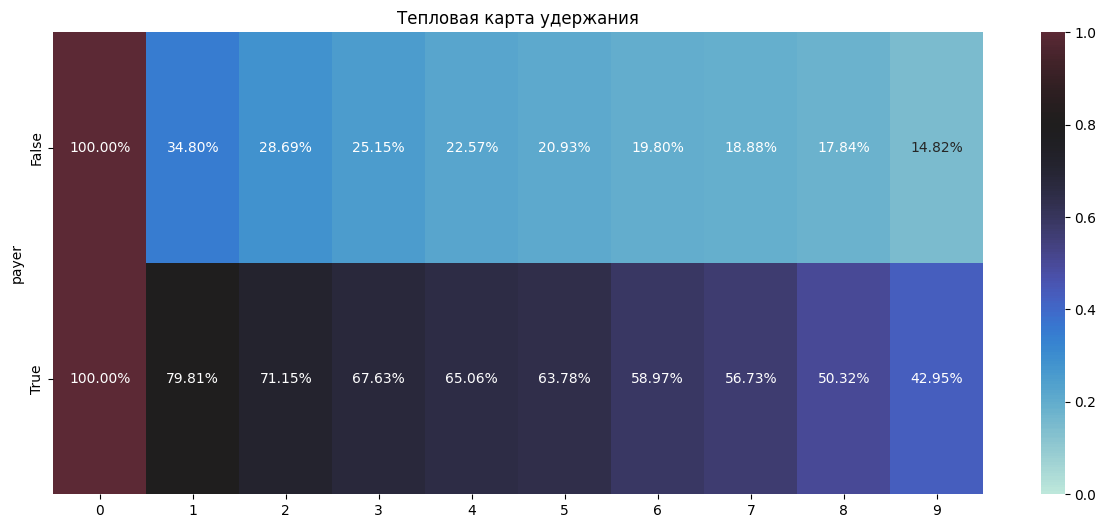

In [55]:
# построим тепловую карту удержания

plt.figure(figsize = (15, 6))
sns.heatmap(retention.drop(columns = ['cohort_size']),
            annot = True,
            fmt = '.2%',
            vmin = 0,
            vmax = 1,
            center = 0.8
)
plt.title('Тепловая карта удержания')
plt.show()

> **Вывод:** Из тепловой карты удержания видно, что платящие пользователи удерживаются лучше: на 10 день удержание платящих пользователей составляет 42.95% против 14.82% неплатящих




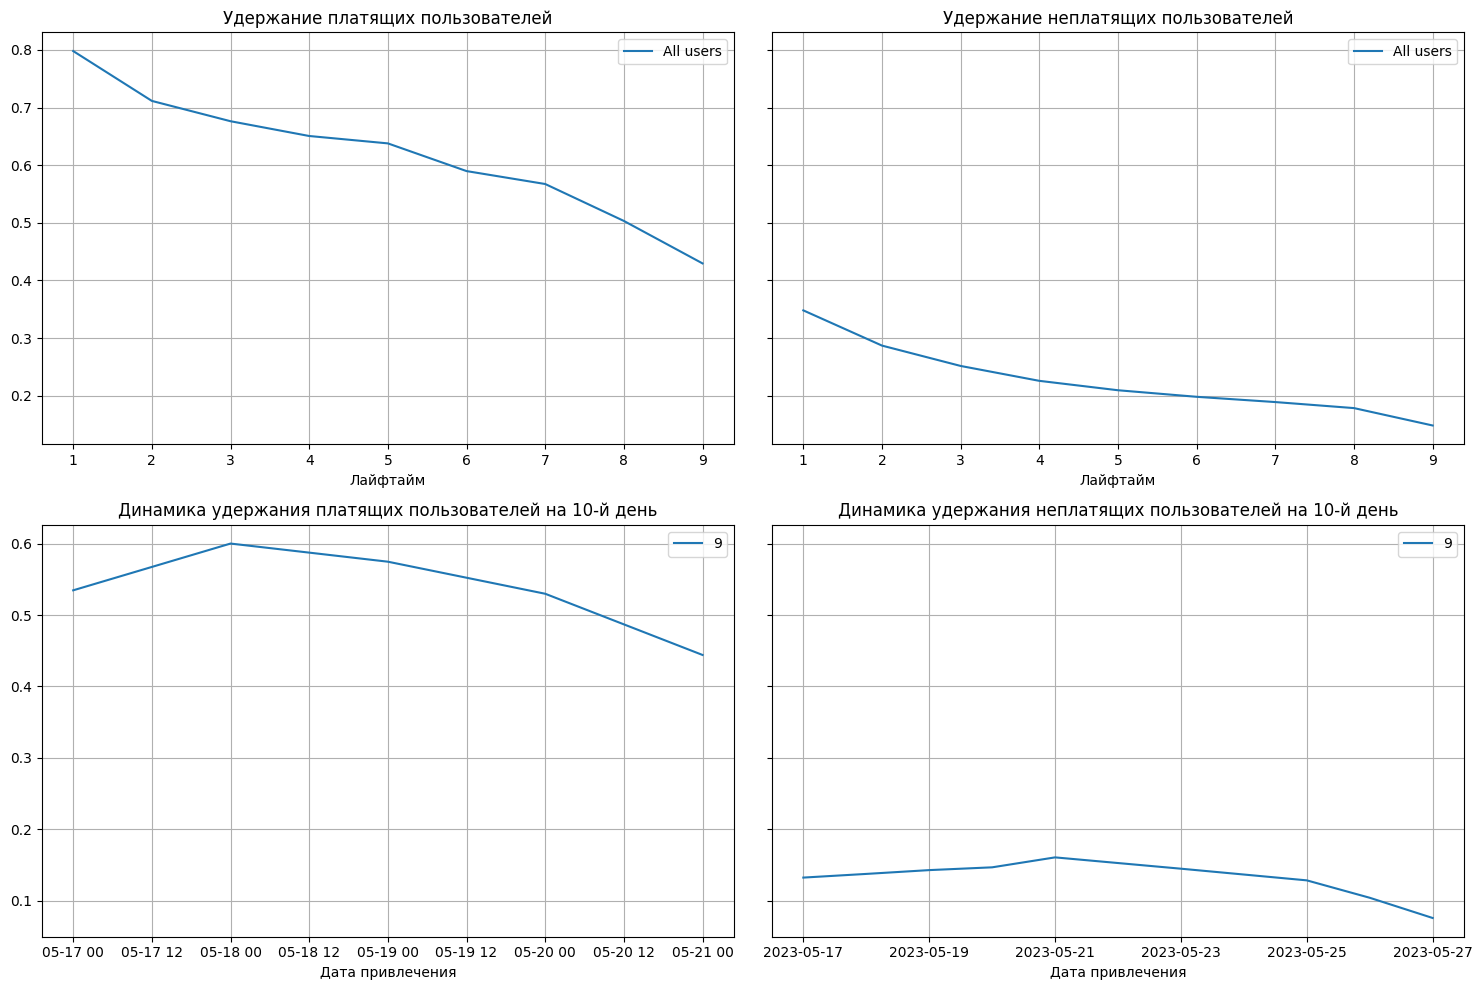

In [56]:
plot_retention(retention, retention_history, horizon, window=7)

In [108]:
def get_conversion(
    profiles,
    payments,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Шаг 1. Получить пользовательские профили и данные о покупках
    # передаём их в качестве аргументов profiles и purchases

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Найти дату и время первой покупки для каждого пользователя
    first_purchases = (
        payments.sort_values(by=['user_id', 'pay_time'])
        .groupby('user_id')
        .agg({'pay_time': 'first'})
        .rename(columns={'pay_time':'first_pay'})
        .reset_index()
    )

    # Шаг 3. Добавить данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'first_pay']], on='user_id', how='left'
    )

    # Шаг 4. Рассчитать лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['first_pay'] - result_raw['first_ts']
    ).dt.days


    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 5. Построить таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # Шаг 6. Посчитать сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # Шаг 7. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 8. Объединить таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 9. Разделить каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [109]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    payments,
    observation_date,
    horizon,
    dimensions=['payer'],
    ignore_horizon=False
)

In [111]:
conversion_raw.query('payer==True').head()

,user_id,first_ts,dt,month,payer,reg_time,first_pay,lifetime
298,132898,2023-05-11 17:39:42,2023-05-11,2023-05-11 17:39:42,True,2023-05-11 17:39:42,2023-05-12 16:57:40,0.0
310,760842,2023-05-11 18:57:00,2023-05-11,2023-05-11 18:57:00,True,2023-05-11 18:57:00,2023-05-12 11:01:32,0.0
409,583406,2023-05-12 03:41:08,2023-05-12,2023-05-12 03:41:08,True,2023-05-12 03:41:08,2023-05-17 11:41:32,5.0
477,512517,2023-05-12 08:01:28,2023-05-12,2023-05-12 08:01:28,True,2023-05-12 08:01:28,2023-05-17 15:51:06,5.0
529,861603,2023-05-12 11:04:24,2023-05-12,2023-05-12 11:04:24,True,2023-05-12 11:04:24,2023-05-12 14:50:30,0.0


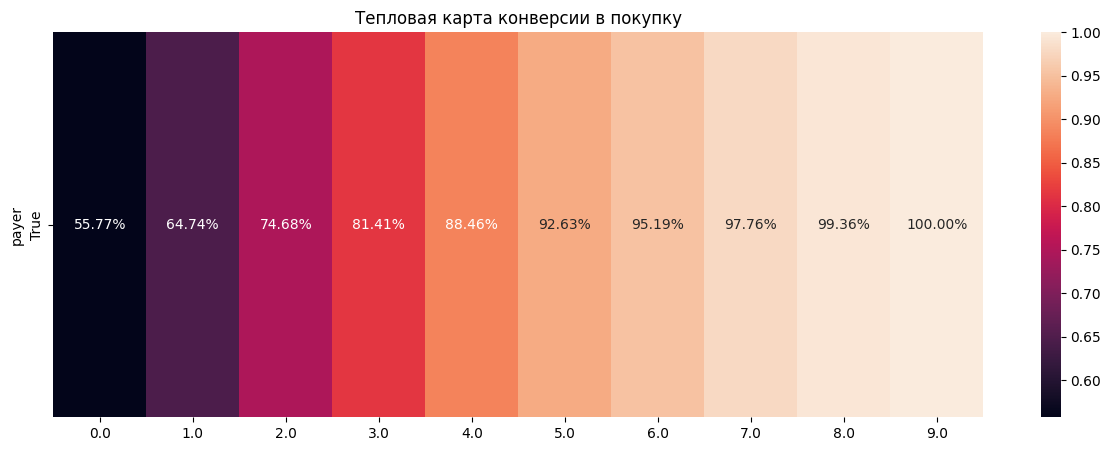

In [60]:
# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.query('payer == True').drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии в покупку')
plt.show()

In [61]:
# посчитаем продолжительность сессии в минутах

sessions['duration'] = ((sessions['close_time']-sessions['open_time'])/ np.timedelta64(1, 'm')).round(2)
sessions.head()

,user_id,close_time,open_time,duration
0,875013,2023-05-16 05:18:00,2023-05-16 05:06:08,11.87
1,138278,2023-05-16 06:48:24,2023-05-16 06:47:34,0.83
2,138278,2023-05-18 01:44:40,2023-05-18 01:07:58,36.70
3,138278,2023-05-18 05:02:58,2023-05-18 04:51:06,11.87
4,138278,2023-05-19 05:58:32,2023-05-19 05:46:20,12.20


In [62]:
# найдем суммарную продолжительность сессий за период и общее количество сессий за тот же период, посчитаем среднюю продолжтельность сессии для пользователя

asl = (
    sessions.pivot_table(
        index='user_id',
        values='duration',
        aggfunc={'sum','count'}
        ).rename(columns={'sum':'total_duration', 'count':'sessions_number'})
        .sort_values(by='user_id')
        .reset_index()
)
asl['asl'] = asl['total_duration']/asl['sessions_number']

asl.head()

,user_id,sessions_number,total_duration,asl
0,46,1,2.80,2.800
1,58,1,18.70,18.700
2,95,1,4.13,4.130
3,109,1,5.13,5.130
4,117,2,5.33,2.665


In [63]:
sessions_number_avg = asl['sessions_number'].median()
print('Среднее количество сессий', sessions_number_avg)

Среднее количество сессий 2.0


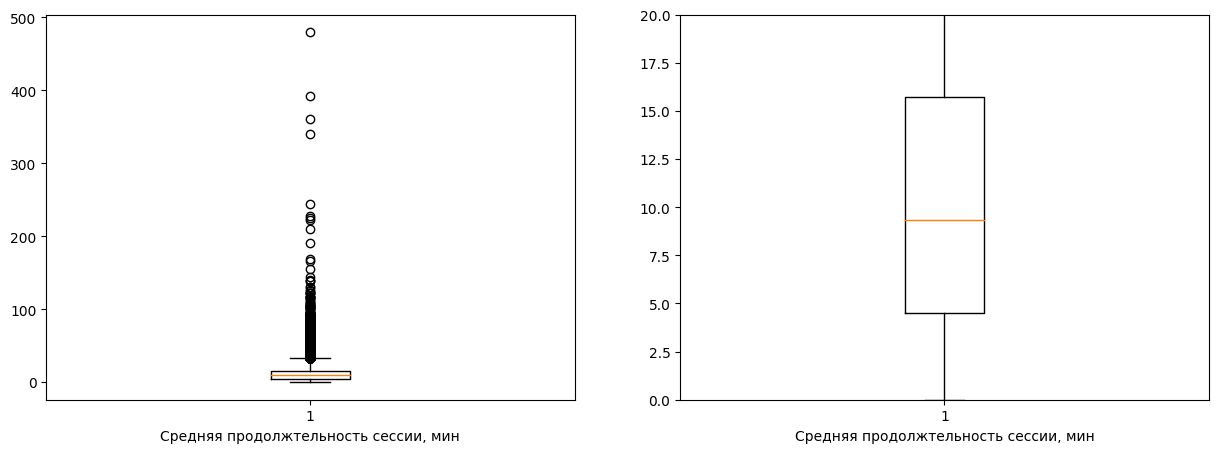

In [64]:
# посмотрим на распределение средней продолжительности сессии для каждого пользователя

fig = plt.figure(figsize=(15,5))
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

y = asl['asl']
ax_1.boxplot(y)
ax_1.set_xlabel('Средняя продолжтельность сессии, мин')
ax_2.boxplot(y)
ax_2.set_xlabel('Средняя продолжтельность сессии, мин')
ax_2.set_ylim([0,20])

fig.show()

In [65]:
data_out_share = asl.query('asl > 16')['user_id'].count() / asl['user_id'].count()
print(f'Процент выбросов в данных по количеству событий на пользователя {data_out_share:.2%}')

Процент выбросов в данных по количеству событий на пользователя 24.32%


> Выбросов получилось большое количество (за выброс считаем количество событий на пользователя больше 16). Поэтому в данном случае необходимо использовать медиану для определения средней продолжтельности сессии пользователя.

In [66]:
# посчитаем, сколько в среднем длится сессия

session_avg = asl['asl'].median()
print('Средняя продолжительность сессии', session_avg.round(0), 'мин')

Средняя продолжительность сессии 9.0 мин


> **Вывод:** </br>
1. Платящие пользователи составляют 1% от общего числа пользователей.
2. Платящие пользователи удерживаются лучше: на 10 день их удержание составляет 42.95% против 14.82% для неплатящих пользователей.
3. Средняя продолжительность сессии составляет 9 минут, среднее количество - 2 сессии.

### <a id='usermap'> Изучение пути пользователя в игре </a>

In [67]:
# объединим таблицы levels и users

levels_merged = (
    users.merge(levels, on="user_id", how='left')
    .sort_values(by=['user_id','time'])
)
levels_merged.head()

,user_id,reg_time,time,level
25233,46,2023-05-16 09:26:38,NaT,NaN
39944,58,2023-05-16 08:30:12,2023-05-16 08:35:02,2.0
39945,58,2023-05-16 08:30:12,2023-05-16 08:40:22,3.0
64592,95,2023-05-16 21:12:02,2023-05-16 21:14:38,2.0
98499,109,2023-05-16 04:40:08,2023-05-16 04:42:04,2.0


In [68]:
only_regs = levels_merged['level'].isna().sum()
print('Количество пользователей, которые только зарегистрировались, но не играли:', only_regs)
percentage = only_regs/users['user_id'].count()
print(f'Они составляют {percentage:.1%} от общего числа пользователей')

Количество пользователей, которые только зарегистрировались, но не играли: 5569
Они составляют 17.9% от общего числа пользователей


In [69]:
# посмотрим распределение игроков по уровням

users_per_levels = (
    levels_merged.pivot_table(
        index='level',
        values='user_id',
        aggfunc='nunique'
    ).rename(columns={'user_id':'total_count'})
    .sort_values(by='total_count', ascending=False)
    .reset_index()
)

In [70]:
# столбчатая диаграмма

def bar(data, x, y, text, title, xaxis_title, yaxis_title):
    fig = px.bar(data,
                 x=x, # указываем столбец с данными для оси X
                 y=y, # указываем столбец с данными для оси Y
                 text=text, # добавляем аргумент, который отобразит текст с информацией
                 color_discrete_sequence=px.colors.qualitative.Pastel1
                )
    # оформляем график

    fig.update_layout(title=title,
                       xaxis_title=xaxis_title,
                       yaxis_title=yaxis_title)

    fig.show() # выводим график

In [71]:
# строим столбчатую диаграмму

x_2 = 'level'
y_2 = 'total_count'
title_2 = 'Количество пользователей на уровне'
xaxis_title_2 = 'Уровень'
yaxis_title_2 = 'Количество пользователей'

bar(users_per_levels, x_2, y_2, y_2, title_2, xaxis_title_2, yaxis_title_2)

In [72]:
# посмотрим, сколько времени (в секундах) ученики потратили на тот или иной уровень

levels_merged = levels_merged.dropna()

In [73]:
levels_merged['diff'] = levels_merged.groupby('user_id')['time'].diff()
levels_merged.head(5)

,user_id,reg_time,time,level,diff
39944,58,2023-05-16 08:30:12,2023-05-16 08:35:02,2.0,NaT
39945,58,2023-05-16 08:30:12,2023-05-16 08:40:22,3.0,0 days 00:05:20
64592,95,2023-05-16 21:12:02,2023-05-16 21:14:38,2.0,NaT
98499,109,2023-05-16 04:40:08,2023-05-16 04:42:04,2.0,NaT
98500,109,2023-05-16 04:40:08,2023-05-16 04:44:28,3.0,0 days 00:02:24


In [74]:
user_map = levels_merged.dropna()
user_map.head()

,user_id,reg_time,time,level,diff
39945,58,2023-05-16 08:30:12,2023-05-16 08:40:22,3.0,0 days 00:05:20
98500,109,2023-05-16 04:40:08,2023-05-16 04:44:28,3.0,0 days 00:02:24
100724,199,2023-05-19 13:35:16,2023-05-19 13:40:40,3.0,0 days 00:02:10
100725,199,2023-05-19 13:35:16,2023-05-19 13:45:04,4.0,0 days 00:04:24
100726,199,2023-05-19 13:35:16,2023-05-22 20:32:04,5.0,3 days 06:47:00


In [75]:
user_map['duration_level'] = (user_map['diff'].dt.total_seconds()/60).round(2)
user_map.head()

,user_id,reg_time,time,level,diff,duration_level
39945,58,2023-05-16 08:30:12,2023-05-16 08:40:22,3.0,0 days 00:05:20,5.33
98500,109,2023-05-16 04:40:08,2023-05-16 04:44:28,3.0,0 days 00:02:24,2.40
100724,199,2023-05-19 13:35:16,2023-05-19 13:40:40,3.0,0 days 00:02:10,2.17
100725,199,2023-05-19 13:35:16,2023-05-19 13:45:04,4.0,0 days 00:04:24,4.40
100726,199,2023-05-19 13:35:16,2023-05-22 20:32:04,5.0,3 days 06:47:00,4727.00


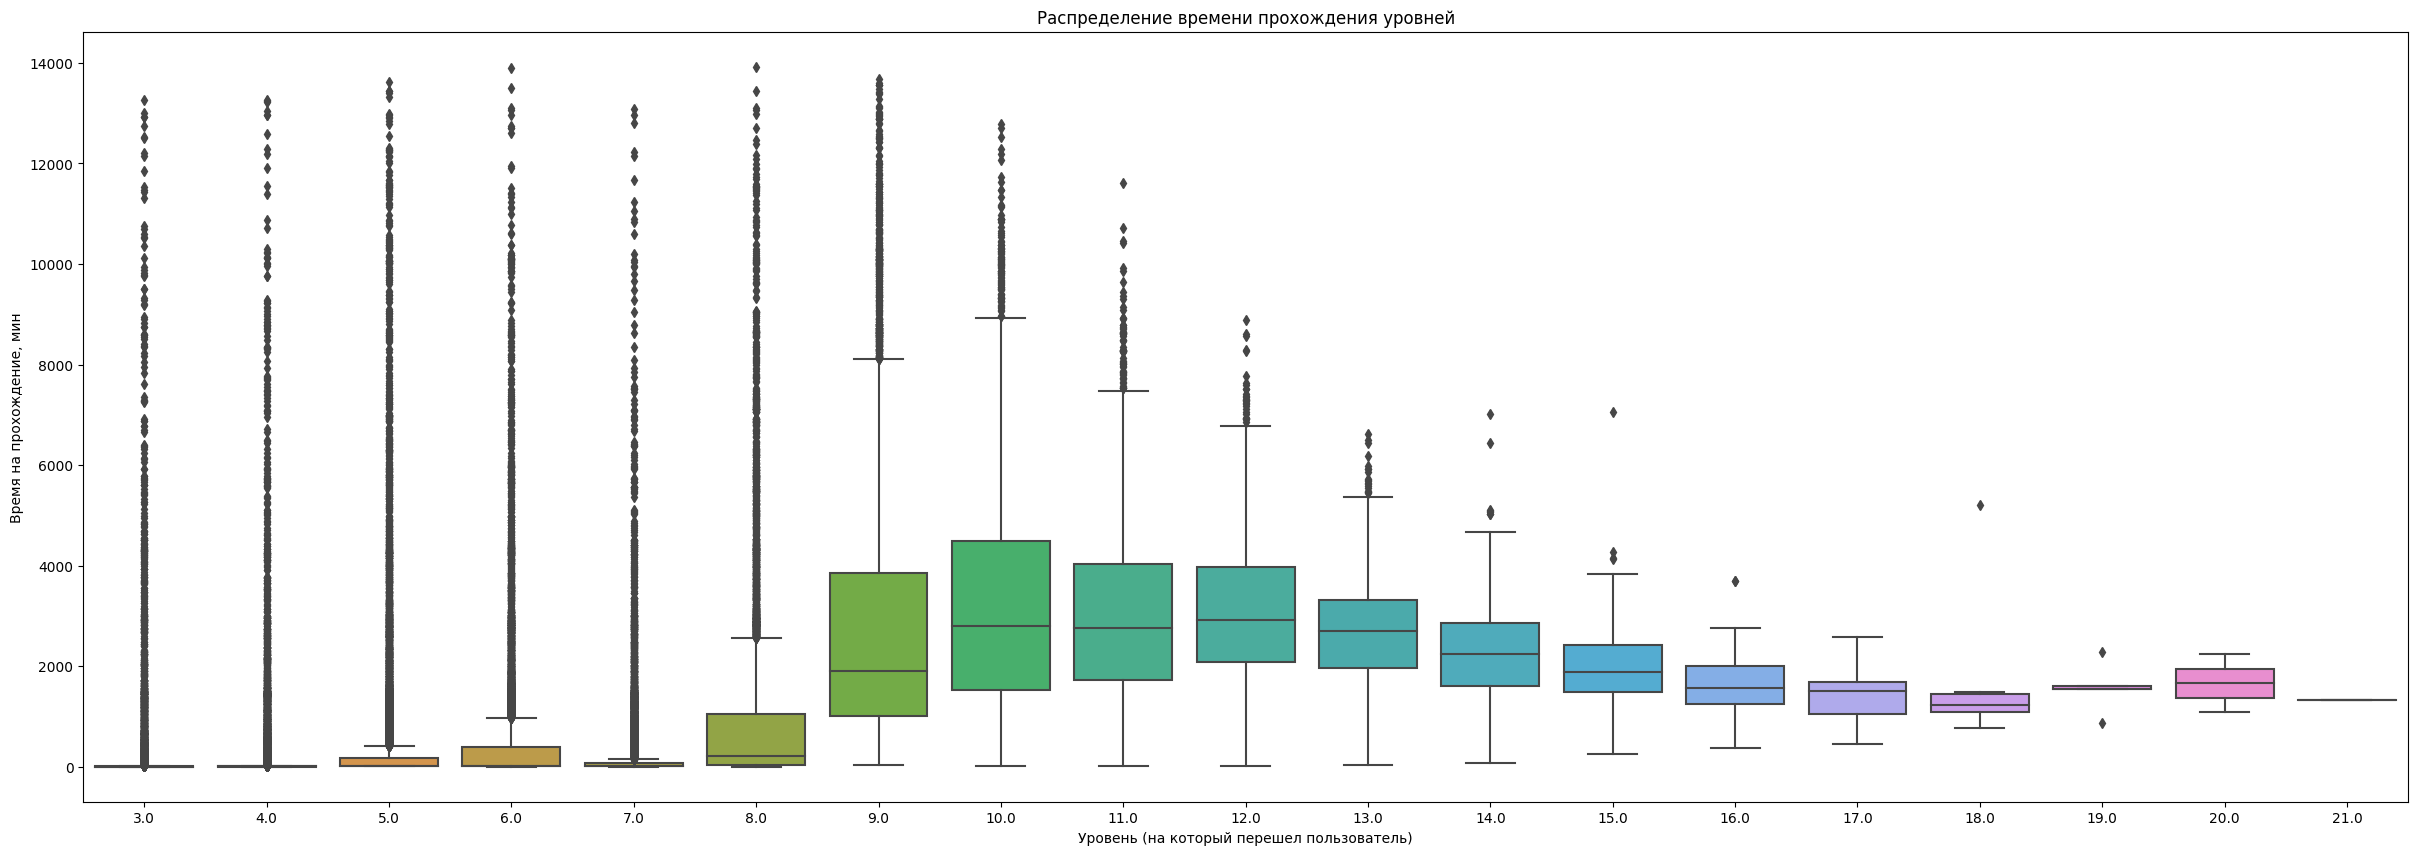

In [76]:
# построим ящик с усами, чтобы посмотреть распределение времени переходов между уровнями у пользователей

plt.figure(figsize=(30,10))
sns.boxplot(data=user_map, x='level', y='duration_level') # уберем строки с пропущенным значением в столбце seats
plt.xlabel('Уровень (на который перешел пользователь)')
plt.ylabel('Время на прохождение, мин')
plt.title('Распределение времени прохождения уровней')
plt.show()

> Наблюдаем сильный разброс времени прохождения уровней. Это объясняется тем, что некоторые пользователи проходят уровень за уровнем без остановки, в то время как другие делают перерывы в учебе и выходят из приложения

In [77]:
levels_duration = (
    user_map.groupby('level')['duration_level']
    .median()
    .reset_index()
)

In [78]:
x_2 = 'level'
y_2 = 'duration_level'
title_2 = 'Средняя продолжительность перехода на уровень (прохождения предыдущего уровня)'
xaxis_title_2 = 'Уровень'
yaxis_title_2 = 'Продолжительность, мин'

bar(levels_duration, x_2, y_2, y_2, title_2, xaxis_title_2, yaxis_title_2)

> На графике видно, что первые 7 уровней пользователи проходят быстро - в пределах часа, затем время перехода на следующий уровень резко растет. Максимальная продолжительность отмечается для перехода с 11 на 12 уровни - порядка 2 дней.

> **Вывод:**
Переходы между первыми 7 уровнями пользователи осуществляют быстро - в пределах получаса, на 8 уровень пользователь в среднем переходит за 2 с небольшим часа. Начиная с 9 уровня длительность прохождения резко увеличивается: на 8 и последующих уровнях пользователи находятся приимерно сутки и больше. Это может быть связано со сложностью и мотивацией пользователей (чем дальше движемся,тем меньше заряженность человека заниматься)

### <a id='money'> Расчет метрик монетизации для всей когорты </a>

Для определения уровня дохода с приложения или игры используют следующие метрики:

- доход от пользователя (ARPU = Доход за период/ Аудитория за период).

- доход от платной подписки (ARPPU = Доход за период/ Число платных подписок за период).

- доля платящих пользователей (Paying Share = Число платных пользователей за период/ Аудитория за период).

Рассчитаем следующие вспомогательные метрики и метрики монетизации:
1. DAU - количество уникальных пользователей в день (вспомогательная)
2. DAPU - количество уникальных платящих пользователей в день (вспомогательная)
3. ARPPU - средняя выручка на одного платящего пользователя
4. Paying share - доля платящих пользователей от общего числа активных
5. LTV (ARPU) - средняя выручка на одного активного пользователя


In [79]:
# посчитаем DAU

sessions['session_date'] = sessions['open_time'].dt.date
dau = sessions.groupby('session_date').agg({'user_id': 'nunique'}).reset_index().rename(columns={'user_id':'DAU'})
dau.head()

,session_date,DAU
0,2023-05-11,347
1,2023-05-12,566
2,2023-05-13,859
3,2023-05-14,1673
4,2023-05-15,4758


In [80]:
# посчитаем DAPU

payers = payments['user_id'].unique()
dapu = sessions.query('user_id in @payers').groupby('session_date').agg({'user_id': 'nunique'}).reset_index().rename(columns={'user_id':'DAPU'})
dapu.head()

,session_date,DAPU
0,2023-05-11,2
1,2023-05-12,8
2,2023-05-13,15
3,2023-05-14,18
4,2023-05-15,31


In [81]:
# посчитаем paying share

active_users = dau.merge(dapu, on='session_date')
active_users['paying_share, %'] = (active_users['DAPU']/active_users['DAU']*100).round(2)
active_users.head()

,session_date,DAU,DAPU,"paying_share, %"
0,2023-05-11,347,2,0.58
1,2023-05-12,566,8,1.41
2,2023-05-13,859,15,1.75
3,2023-05-14,1673,18,1.08
4,2023-05-15,4758,31,0.65


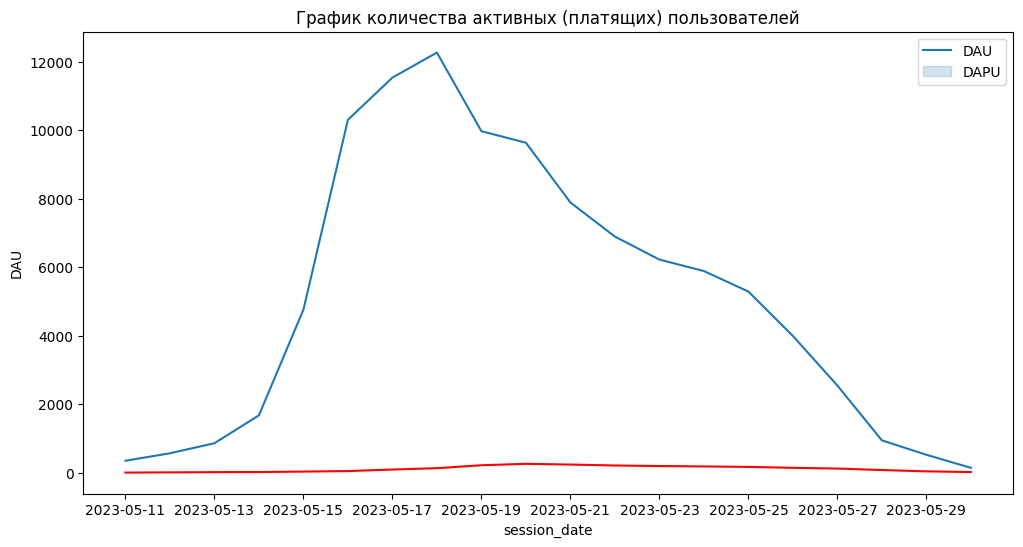

In [82]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=active_users, x='session_date',y='DAU')
sns.lineplot(data=active_users, x='session_date',y='DAPU', color='r')
plt.legend(labels = ('DAU', 'DAPU'))
plt.title('График количества активных (платящих) пользователей')
plt.show()

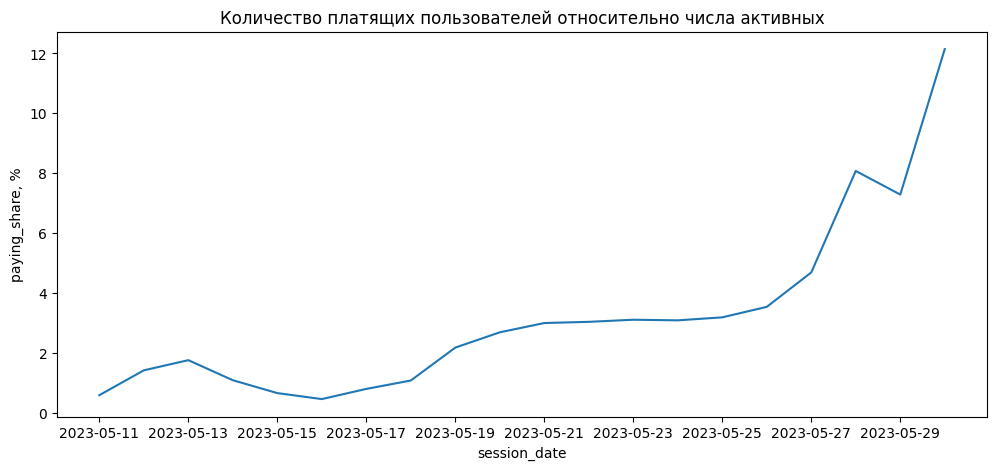

In [83]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=active_users, x='session_date',y='paying_share, %')
plt.title('Количество платящих пользователей относительно числа активных')
plt.show()

> **Вывод:**
Количество активных пользователей резко растет, начиная с 14 мая. Пик активность достигается 18 мая, далее наблюдается спад вплоть до 30 мая. Причем активность 30 мая даже ниже активности 11 мая, в начале анализируемого периода.
Количество платящих пользователей находится примерно на одном уровне на протяжении всего периода с 11 по 30 мая.

> Можно сделать предположение, что в период с 13 по 18 мая активно привлекались новые пользователи, однако их активность спала спустя некоторое время, а платежи он не совершали. Платящей аудиторией, скорее всего, как были, так и остались постоянные пользователи.

In [84]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'pay_time', 'amt']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['pay_time'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='amt',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

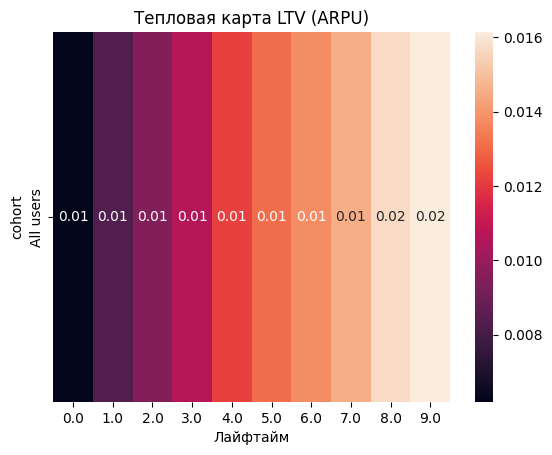

In [85]:
ltv_raw, ltv, ltv_history = get_ltv(profiles, payments, observation_date, horizon)

sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV (ARPU)')
plt.xlabel('Лайфтайм')
plt.show()

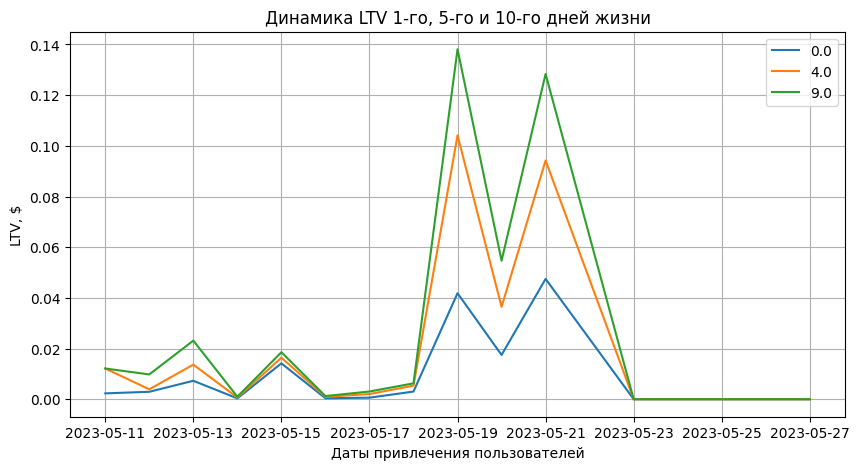

In [86]:
# строим график истории изменений LTV

report = ltv_history[[0, 4, 9]]  # делаем срез данных
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика LTV 1-го, 5-го и 10-го дней жизни')
plt.ylabel('LTV, $')
plt.xlabel('Даты привлечения пользователей')
plt.show()

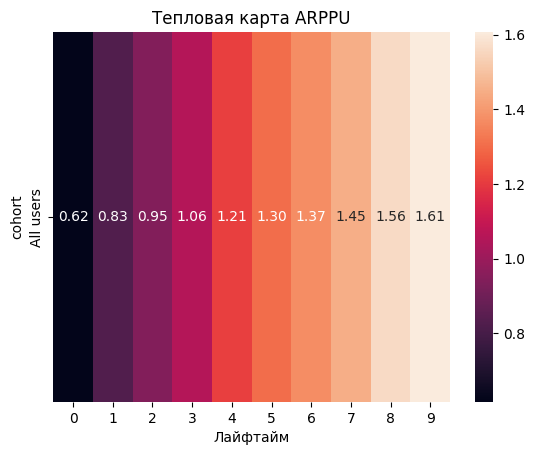

In [87]:
arppu_raw, arppu, arppu_history = get_ltv(profiles.query('payer == True'), payments, observation_date, horizon)

sns.heatmap(arppu.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта ARPPU')
plt.xlabel('Лайфтайм')
plt.show()

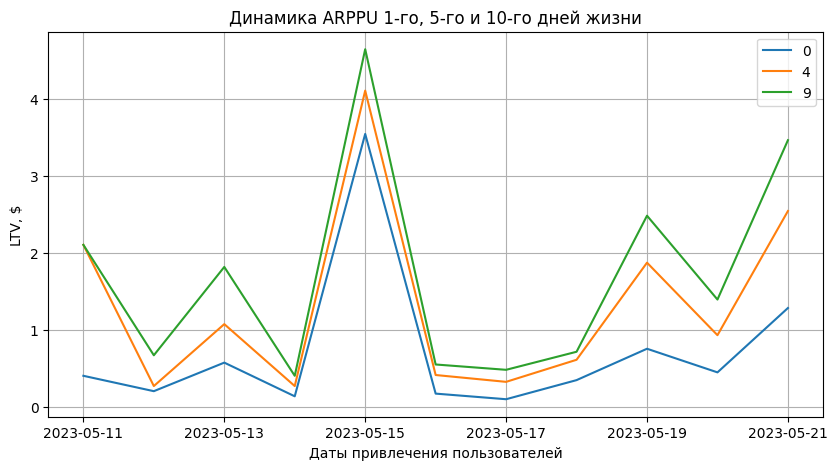

In [88]:
# строим график истории изменений ARPPU

report = arppu_history[[0, 4, 9]]  # делаем срез данных
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика ARPPU 1-го, 5-го и 10-го дней жизни')
plt.ylabel('LTV, $')
plt.xlabel('Даты привлечения пользователей')
plt.show()

In [163]:
arppu_raw['pay_date'] = pd.to_datetime(arppu_raw['pay_time'].dt.date)
pivot_arppu = (
    arppu_raw.query('pay_date=="2023-05-15"')
    .pivot_table(
        index='user_id',
        values='amt',
        aggfunc='sum'
    ).sort_values(by='amt', ascending=False)
    .reset_index()
)
pivot_arppu

,user_id,amt
0,759639,52.151757
1,762442,0.800437
2,573302,0.400218
3,618523,0.400218
4,424571,0.199608
5,754465,0.199608
6,970927,0.199608
7,974420,0.199608


> **Вывод:** Резкий скачок ARPPU связан с тем, что пользователь 759639 совершил покупки на аномально большую сумму.

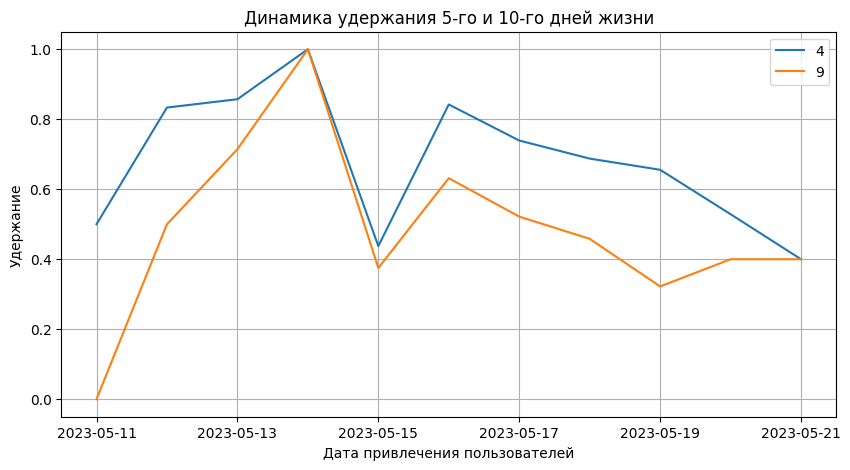

In [89]:
report = retention_history.query('payer == True').droplevel('payer')[[4, 9]]
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика удержания 5-го и 10-го дней жизни')
plt.ylabel('Удержание')
plt.xlabel('Дата привлечения пользователей')
plt.show()

> **Вывод:**
ARPU за 10 дней составил 0.02, а ARPPU - 1.61. Наблюдаются два пика на графике ARPU - 19го  и 21го мая. Это может быть объяснено тем, что пользователи, которые много покупали, быстро отвалились. На графике удержания видим резкое падение именно 15го мая.

### <a id='payments'> Изучение того, где ученики совершают больше всего платежей </a>

In [90]:
# добавим время перехода на следующий уровень

levels_test = levels.copy(deep=True)
levels_test = levels_test.sort_values(by=['user_id','time'])
levels_test['end_level'] = levels_test.groupby('user_id')['time'].shift(-1)
levels_test.head()

,user_id,time,level,end_level
15682,58,2023-05-16 08:35:02,2.0,2023-05-16 08:40:22
15683,58,2023-05-16 08:40:22,3.0,NaT
30895,95,2023-05-16 21:14:38,2.0,NaT
76733,109,2023-05-16 04:42:04,2.0,2023-05-16 04:44:28
76734,109,2023-05-16 04:44:28,3.0,NaT


In [91]:
# отфильтруем датасет по платящим пользователям и заполним пропуски

payments_levels = levels_test.query('user_id in @payers')
a = np.datetime64("2024-01-01") #означает, что пользователь в настоящий момент на этом уровне
payments_levels = payments_levels.fillna(a)

In [92]:
a = payments
b = payments_levels

In [93]:
# добавим информацию о том, на каком уровне был совершен платеж

data = pd.DataFrame(columns=['user_id', 'pay_time', 'amt', 'pay_date', 'level'])
for i in payers.tolist():
  try:
    c = i
    k = a.query('user_id== @c')
    t = b.query('user_id== @c')
    t.index = pd.IntervalIndex.from_arrays(t['time'],t['end_level'],closed='both')
    k['level'] = k['pay_time'].apply(lambda x : t.iloc[t.index.get_loc(x)]['level'])
    data = pd.concat([data,k], axis=0)
  except:
    pass
data.head()

,user_id,pay_time,amt,pay_date,level
0,107907,2023-05-29 17:08:18,0.400218,NaN,9.0
1,510991,2023-05-20 16:55:02,0.199608,NaN,7.0
2,294837,2023-05-19 01:41:56,0.199608,NaN,6.0
3,644287,2023-05-20 03:01:54,0.199608,NaN,7.0
4,673424,2023-05-20 03:33:36,0.099302,NaN,8.0


In [119]:
b.head()

,user_id,time,level,end_level
70803,199,2023-05-19 13:38:30,2.0,2023-05-19 13:40:40
70804,199,2023-05-19 13:40:40,3.0,2023-05-19 13:45:04
70805,199,2023-05-19 13:45:04,4.0,2023-05-22 20:32:04
70806,199,2023-05-22 20:32:04,5.0,2023-05-22 20:42:28
70807,199,2023-05-22 20:42:28,6.0,2023-05-22 21:27:22


In [94]:
data_levels = (
    data.pivot_table(
        index='level',
        values='amt',
        aggfunc='count'
    ).rename(columns={'amt':'pay_number'})
    .sort_values(by='level')
    .reset_index()
)

In [95]:
x_2 = 'level'
y_2 = 'pay_number'
title_2 = 'Количество платежей на уровне'
xaxis_title_2 = 'Уровень'
yaxis_title_2 = 'Количество платежей'

bar(data_levels, x_2, y_2, y_2, title_2, xaxis_title_2, yaxis_title_2)

> **Вывод:**
Больше всего платежей пользователи совершают на 8-10 уровнях. 171 платеж был совершен на 8 уровне, 119 - на 9ом, 84 - на 10ом уровне.

### <a id='firstpayments'> Изучение того, где ученики совершают первые платежи </a>

In [118]:
d = conversion_raw.query('user_id in @payers')[['user_id', 'first_pay']]
d.head()

,user_id,first_pay
298,132898,2023-05-12 16:57:40
310,760842,2023-05-12 11:01:32
409,583406,2023-05-17 11:41:32
477,512517,2023-05-17 15:51:06
529,861603,2023-05-12 14:50:30


In [120]:
# добавим информацию о том, на каком уровне был совершен первый платеж

data_1 = pd.DataFrame(columns=['user_id', 'first_pay', 'level'])
for i in payers.tolist():
  try:
    c = i
    k = d.query('user_id== @c')
    t = b.query('user_id== @c')
    t.index = pd.IntervalIndex.from_arrays(t['time'],t['end_level'],closed='both')
    k['level'] = k['first_pay'].apply(lambda x : t.iloc[t.index.get_loc(x)]['level'])
    data_1 = pd.concat([data_1,k], axis=0)
  except:
    pass
data_1.head()

,user_id,first_pay,level
30742,107907,2023-05-29 17:08:18,9.0
28948,510991,2023-05-20 16:55:02,7.0
26716,294837,2023-05-19 01:41:56,6.0
29276,644287,2023-05-20 03:01:54,7.0
22465,673424,2023-05-20 03:33:36,8.0


In [128]:
first_pay = (
    data_1.pivot_table(
        index='level',
        values='user_id',
        aggfunc='count'
    ).rename(columns={'user_id':'payments'})
    .sort_values(by='level')
    .reset_index()
)
first_pay.head()

,level,payments
0,2.0,2
1,3.0,8
2,4.0,41
3,5.0,57
4,6.0,14


In [130]:
x_2 = 'level'
y_2 = 'payments'
title_2 = 'Количество  первых платежей на уровне'
xaxis_title_2 = 'Уровень'
yaxis_title_2 = 'Количество платежей'

bar(first_pay, x_2, y_2, y_2, title_2, xaxis_title_2, yaxis_title_2)

> **Вывод:**
Наибольшее количество первых платежей совершается на 8 уровне - 83 пользователя совершили первую покупку на этом уровне. Второй по популярности уровень для первой покупки - пятый (57 первых платежей).

## <a id='conclusion'> Выводы </a>

**В ходе исследования были выявлены следующие инсайты:**</br>
1. Были рассчитаны удержание и время, которое ученики проводят в приложении. Платящие пользователи удерживаются лучше: на 10 день их удержание составляет 42.95% против 14.82% для неплатящих пользователей. Средняя продолжительность сессии составляет 9 минут.
2. Изучено, как ученики переходят с уровня на уровень. Переходы между первыми 7 уровнями пользователи осуществляют быстро - в пределах получаса, на 8 уровень пользователь в среднем переходит за 2 с небольшим часа. Начиная с 9 уровня длительность прохождения резко увеличивается: на 8 и последующих уровнях пользователи находятся приимерно сутки и больше. Это может быть связано со сложностью и мотивацией пользователей (чем дальше движемся,тем меньше заряженность человека заниматься)
3. Рассчтаны метрики монетизации для всей когорты.
  * Количество активных пользователей резко растет, начиная с 14 мая. Пик активность достигается 18 мая, далее наблюдается спад вплоть до 30 мая. Причем активность 30 мая даже ниже активности 11 мая, в начале анализируемого периода.Количество платящих пользователей находится примерно на одном уровне на протяжении всего периода с 11 по 30 мая. Можно сделать предположение, что в период с 13 по 18 мая активно привлекались новые пользователи, однако их активность спала спустя некоторое время, а платежи он не совершали. Платящей аудиторией, скорее всего, как были, так и остались постоянные пользователи.
  * ARPU за 10 дней составил 0.02, а ARPPU - 1.61. Наблюдаются два пика на графике ARPU - 19го  и 21го мая. Это может быть объяснено тем, что пользователи,которые много покупали, быстро отвалились. На графике удержания видим резкое падение именно 15го мая.
4. Изучено, где ученики совершают больлше всего платежей. Больше всего платежей пользователи совершают на 8-10 уровнях.
5. Изучено, где ученики совершают первые платежи?Наибольшее количество первых платежей совершается на 8 уровне - 83 пользователя совершили первую покупку на этом уровне. Второй по популярности уровень для первой покупки - пятый (57 первых платежей).

В первую очередь следует отслеживать:
*  Retention - важно контролировать удержание пользователей в приложении,
* среднюю продолжительность сессии и их количество - контролируем частоту использования приложения пользователями,
* LTV - оценииваем среднюю выручку с одного активного пользователя,
* ARPPU - отслеживаем лояльность пользователей к ценам.

Также следует отслеживать:
* CAC — стоимость привлечения одного клиента,
* ROI — окупаемость инвестиций.

Для этого необходимо собирать данные по расходам на рекламу.

Также было бы полезно собирать данные:
* о пользователях (пол,возраст, регион проживания) - для составления портрета
* об устройствах (мобльная версия ил браузерная, операционная система) для отслеживания системных сбоев и пр., что может повлиять на метрики